In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/rideshare_kaggle.csv")
df.head(4)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800


In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
categorical_columns = df.select_dtypes(include="object").columns.nunique()
numeric_columns = df.select_dtypes(exclude="object").columns.nunique()

print("Total Categorical Columns",":" ,categorical_columns)
print("Total Numeric Columns", ":" ,numeric_columns)

Total Categorical Columns : 11
Total Numeric Columns : 46


In [ ]:
# While identifying the duplicate values from the whole dataset, we returned with nill results as there is no duplicate value.

df.duplicated().sum()

0

In [ ]:
# On the other hand, we found duplicate values by checking each column seperately.

for col in df.columns:
  duplicated_values = df[col].duplicated().sum()
  print(f"{duplicated_values}: {col}")

0: id
656892: timestamp
693047: hour
693054: day
693069: month
661721: datetime
693070: timezone
693059: source
693059: destination
693069: cab_type
693058: product_id
693058: name
692923: price
692522: distance
693064: surge_multiplier
693060: latitude
693059: longitude
692763: temperature
692752: apparentTemperature
693062: short_summary
693060: long_summary
693008: precipIntensity
693042: precipProbability
693020: humidity
692780: windSpeed
692785: windGust
693046: windGustTime
692844: visibility
692942: temperatureHigh
693048: temperatureHighTime
692938: temperatureLow
693040: temperatureLowTime
692947: apparentTemperatureHigh
693044: apparentTemperatureHighTime
692935: apparentTemperatureLow
693039: apparentTemperatureLowTime
693064: icon
692758: dewPoint
692755: pressure
692876: windBearing
692988: cloudCover
693068: uvIndex
692844: visibility.1
692797: ozone
692961: sunriseTime
692957: sunsetTime
693053: moonPhase
693006: precipIntensityMax
693051: uvIndexTime
692940: temperatur

**Data Cleaning**

In [ ]:
# Rectifying datetime column data type
df["datetime"] = pd.to_datetime(df["datetime"])

In [ ]:
# drop irrelevant and redunt columns

df.drop(["id", "timestamp", "timezone", "icon", "long_summary", "apparentTemperature", "precipIntensity", "precipProbability",
         "windGustTime", "apparentTemperatureHigh", "apparentTemperatureHighTime",
         "apparentTemperatureLow", "apparentTemperatureLowTime", "moonPhase", "precipIntensityMax", "uvIndexTime", "apparentTemperatureMinTime",
         "apparentTemperatureMin", "apparentTemperatureMax", "apparentTemperatureMaxTime", "sunriseTime", "sunsetTime", "temperatureMin",
         "temperatureMinTime", "temperatureMax", "temperatureMaxTime", "temperatureHighTime", "temperatureLowTime", "hour", "day",
         "month", "visibility.1", "ozone", "dewPoint", "windBearing", "uvIndex"], axis=1, inplace=True)

In [ ]:
#  Identifying and Analyzing missing values

missing_data = df.isnull().mean()*100
missing = missing_data[missing_data>0]
missing

,0
price,7.949402


In [ ]:
# I will drop missing values in the "price" column as missing values are less then 10%.

df.dropna(subset=["price"], inplace=True)

In [ ]:
#  Change column names as required
df.rename(columns={"short_summary": "weather_summary"}, inplace=True)

# I am also adding units to the required columns for better understanding
df.rename(columns={"price": "price($)", "distance":"distance(km)", "temperature":"temperature(F)", "temperatureHigh":"temperatureHigh(F)",
                   "temperatureLow":"temperatureLow(F)", "pressure":"pressure(MB)", "humidity":"humidity(%)", "windSpeed":"windSpeed(MPH)",
                   "windGust":"windGust(MPH)"}, inplace=True)

In [ ]:
# I have extracted time, month, day and hour from the datetime column for better analysis.

df["date"] = df["datetime"].dt.date
df["time"] = df["datetime"].dt.time
df["month"] = df["datetime"].dt.month_name()
df["day"] = df["datetime"].dt.day_name()
df["hour"] = df["datetime"].dt.hour

In [ ]:
# I have removed datetime column to avoid duplicity and confusion.

df.drop("datetime", axis=1, inplace=True)

In [ ]:
df.head(4)

,source,destination,cab_type,product_id,name,price($),distance(km),surge_multiplier,latitude,longitude,...,visibility,temperatureHigh(F),temperatureLow(F),pressure(MB),cloudCover,date,time,month,day,hour
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,...,10.000,43.68,34.19,1021.98,0.72,2018-12-16,09:30:07,December,Sunday,9
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,...,4.786,47.30,42.10,1003.97,1.00,2018-11-27,02:00:23,November,Tuesday,2
2,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,...,10.000,47.55,33.10,992.28,0.03,2018-11-28,01:00:22,November,Wednesday,1
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,...,10.000,45.03,28.90,1013.73,0.00,2018-11-30,04:53:02,November,Friday,4


**Data Description**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price($),637976.0,16.545125,9.324359,2.5000,9.0000,13.5000,22.5000,97.5000
distance(km),637976.0,2.189261,1.135413,0.0200,1.2700,2.1600,2.9300,7.8600
surge_multiplier,637976.0,1.015068,0.095422,1.0000,1.0000,1.0000,1.0000,3.0000
latitude,637976.0,42.338161,0.047856,42.2148,42.3503,42.3519,42.3647,42.3661
longitude,637976.0,-71.066144,0.020303,-71.1054,-71.0810,-71.0631,-71.0542,-71.0330
temperature(F),637976.0,39.582406,6.725500,18.9100,36.4500,40.4900,43.5800,57.2200
humidity(%),637976.0,0.741056,0.138575,0.3800,0.6400,0.7100,0.8800,0.9600
windSpeed(MPH),637976.0,6.186795,3.147856,0.4500,3.4100,5.9100,8.4100,15.0000
windGust(MPH),637976.0,8.470616,5.288683,0.8000,4.0600,7.5500,11.7400,27.2500
visibility,637976.0,8.469180,2.601828,0.7170,8.4320,9.8800,9.9960,10.0000


According to the data description;

Price: The average price is around \$16.5, with a wide range from \$0 to \$97.5. The standard deviation is also significant, indicating price variability. Furthermore,  There's significant variability in ride prices, potentially influenced by factors like distance, time of day, demand, and weather.

Distance(km): The average trip distance is about 3 km, with trips ranging from 0 to 30 km. Most trips seem to be relatively short, with an average distance of around 3 km.

surge_multiplier: This column likely represents surge pricing. The average is close to 1 (no surge), but the maximum value indicates surges can go up to 3 times the normal fare.

temperature(F): The temperature data shows the average temperature during the rides, providing context for weather conditions.

windSpeed(MPH), visibility, cloudCover: These weather-related features give additional insights into environmental factors during rides.

In [ ]:
# Correlation Analysis
# Correlation matrix

df.select_dtypes(exclude="object").corr()

,price($),distance(km),surge_multiplier,latitude,longitude,temperature(F),humidity(%),windSpeed(MPH),windGust(MPH),visibility,temperatureHigh(F),temperatureLow(F),pressure(MB),cloudCover,hour
price($),1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.001238,0.000990,0.001218,0.001497,-0.000516,0.000182,0.000866,0.000883,0.000561
distance(km),0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.003849,0.001709,0.000920,0.004143,-0.003795,-0.001744,0.003565,-0.000958,0.002283
surge_multiplier,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.001677,0.002593,0.002162,0.001716,-0.001943,-0.002669,-0.003109,-0.002101,-0.000067
latitude,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.117721,-0.097125,0.024346,0.124286,-0.115623,-0.032005,0.149323,-0.064560,0.019228
longitude,-0.001417,-0.000415,-0.001961,-0.531443,1.000000,0.012402,0.090731,0.092773,-0.006145,-0.097102,0.007682,0.077802,-0.085849,0.073642,-0.005986
temperature(F),-0.000084,-0.002738,-0.001594,-0.098909,0.012402,1.000000,0.313813,0.058846,-0.008775,-0.324158,0.788564,0.502193,-0.339378,0.355049,0.218829
humidity(%),-0.001238,-0.003849,-0.001677,-0.117721,0.090731,0.313813,1.000000,-0.207121,-0.306424,-0.697860,0.429811,0.471614,-0.134010,0.480196,-0.275778
windSpeed(MPH),0.000990,0.001709,0.002593,-0.097125,0.092773,0.058846,-0.207121,1.000000,0.937649,-0.035550,-0.188793,-0.286540,-0.574573,0.159671,0.073011
windGust(MPH),0.001218,0.000920,0.002162,0.024346,-0.006145,-0.008775,-0.306424,0.937649,1.000000,0.038898,-0.230810,-0.341706,-0.513851,0.104673,0.077646
visibility,0.001497,0.004143,0.001716,0.124286,-0.097102,-0.324158,-0.697860,-0.035550,0.038898,1.000000,-0.290560,-0.263606,0.227875,-0.477676,0.173776


Correlation Brief Analysis:

price($) and distance(km) see a strong positive correlation between these two. This indicates that as the distance of a ride increases, the price also tends to increase, which is expected.

Their is a strong posotive relationship bewteen price($) and surge_multiplier. Surge pricing directly impacts the final fare, so a higher surge multiplier will lead to a higher price.

It is likely that price($) and temperature(F) might be weak or close to zero, suggesting that temperature may not have a significant linear relationship with price.

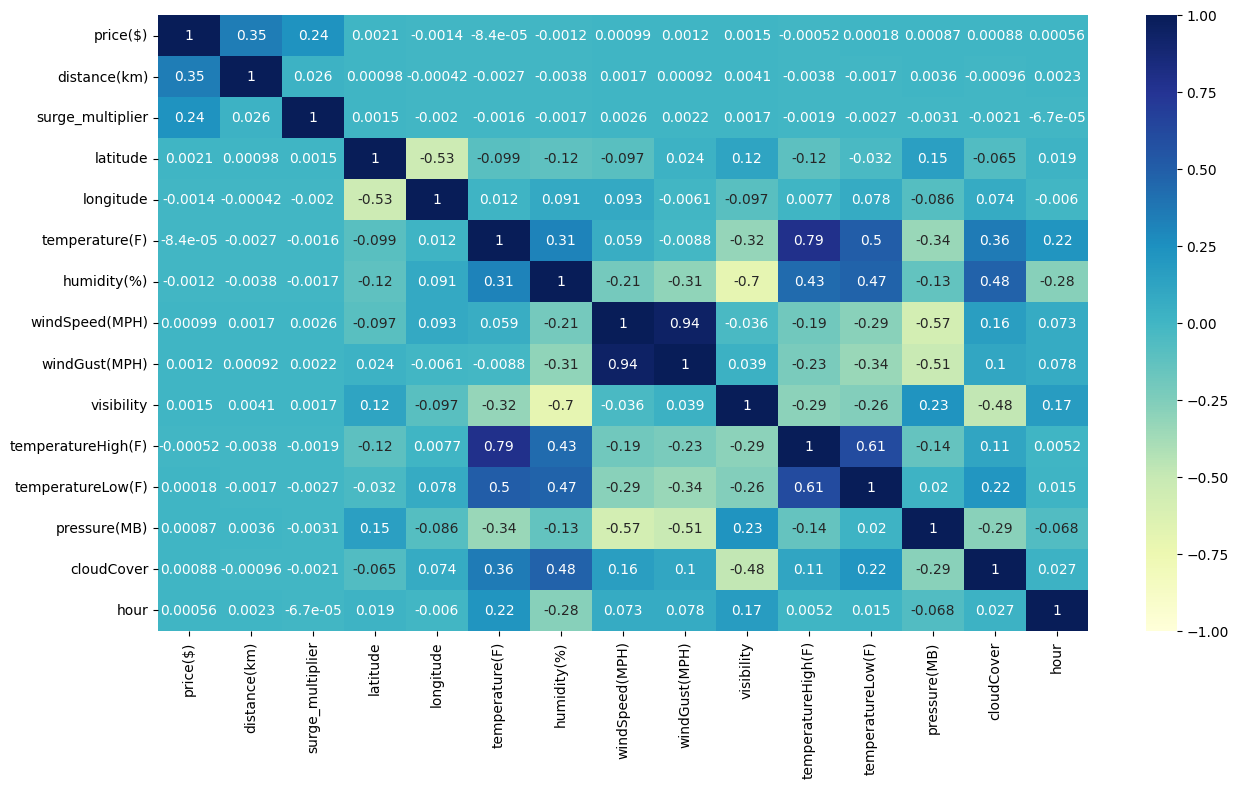

In [ ]:
# Understanding correlation using heatmap

numeric_data = df.select_dtypes(exclude="object").corr()

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data, annot=True, cmap="YlGnBu", vmax=1, vmin=-1)
plt.show()

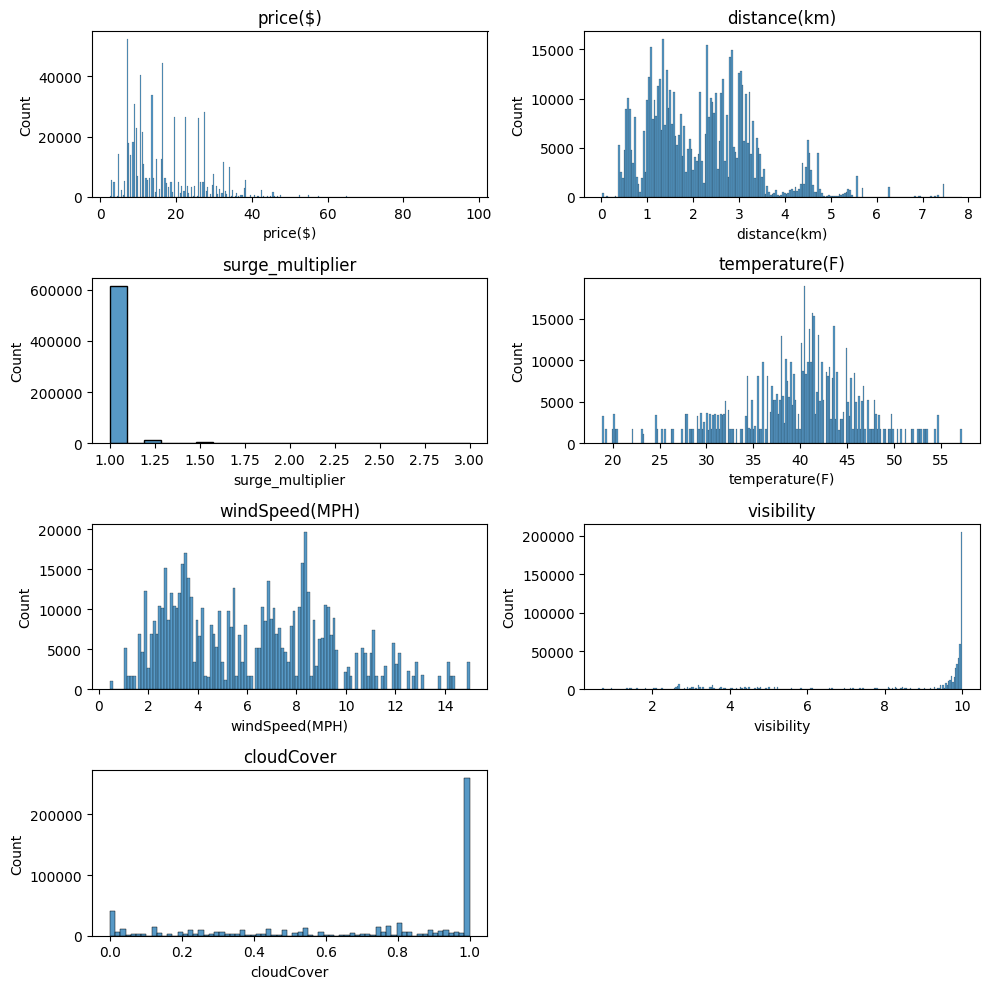

In [ ]:
dist_columns = df[["price($)", "distance(km)", "surge_multiplier", "temperature(F)", "windSpeed(MPH)", "visibility", "cloudCover"]]
plt.figure(figsize=(10, 10))

for i, col in enumerate(dist_columns.columns):
  plt.subplot(4, 2, i+1)
  sns.histplot(df[col])
  plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [ ]:
# Analyzing Distribution

for col in dist_columns.columns:
  k2, p = stats.normaltest(df[col])
  if p >= 0.05:
    print(f"{col}: Normal Distribution")
  else:
    print(f"{col}: Non-Normal Distribution")

price($): Non-Normal Distribution
distance(km): Non-Normal Distribution
surge_multiplier: Non-Normal Distribution
temperature(F): Non-Normal Distribution
windSpeed(MPH): Non-Normal Distribution
visibility: Non-Normal Distribution
cloudCover: Non-Normal Distribution


In [ ]:
# Analyzing Skewness
data_skewness = df.select_dtypes(exclude="object")

for col in data_skewness.columns:
  skewness = df[col].skew()
  if skewness < -1 or skewness > 1:
    print(f"{col}: Skewed Distribution")
  else:
    print(f"{col}: Not Skewed")

price($): Skewed Distribution
distance(km): Not Skewed
surge_multiplier: Skewed Distribution
latitude: Skewed Distribution
longitude: Not Skewed
temperature(F): Not Skewed
humidity(%): Not Skewed
windSpeed(MPH): Not Skewed
windGust(MPH): Skewed Distribution
visibility: Skewed Distribution
temperatureHigh(F): Not Skewed
temperatureLow(F): Not Skewed
pressure(MB): Not Skewed
cloudCover: Not Skewed
hour: Not Skewed


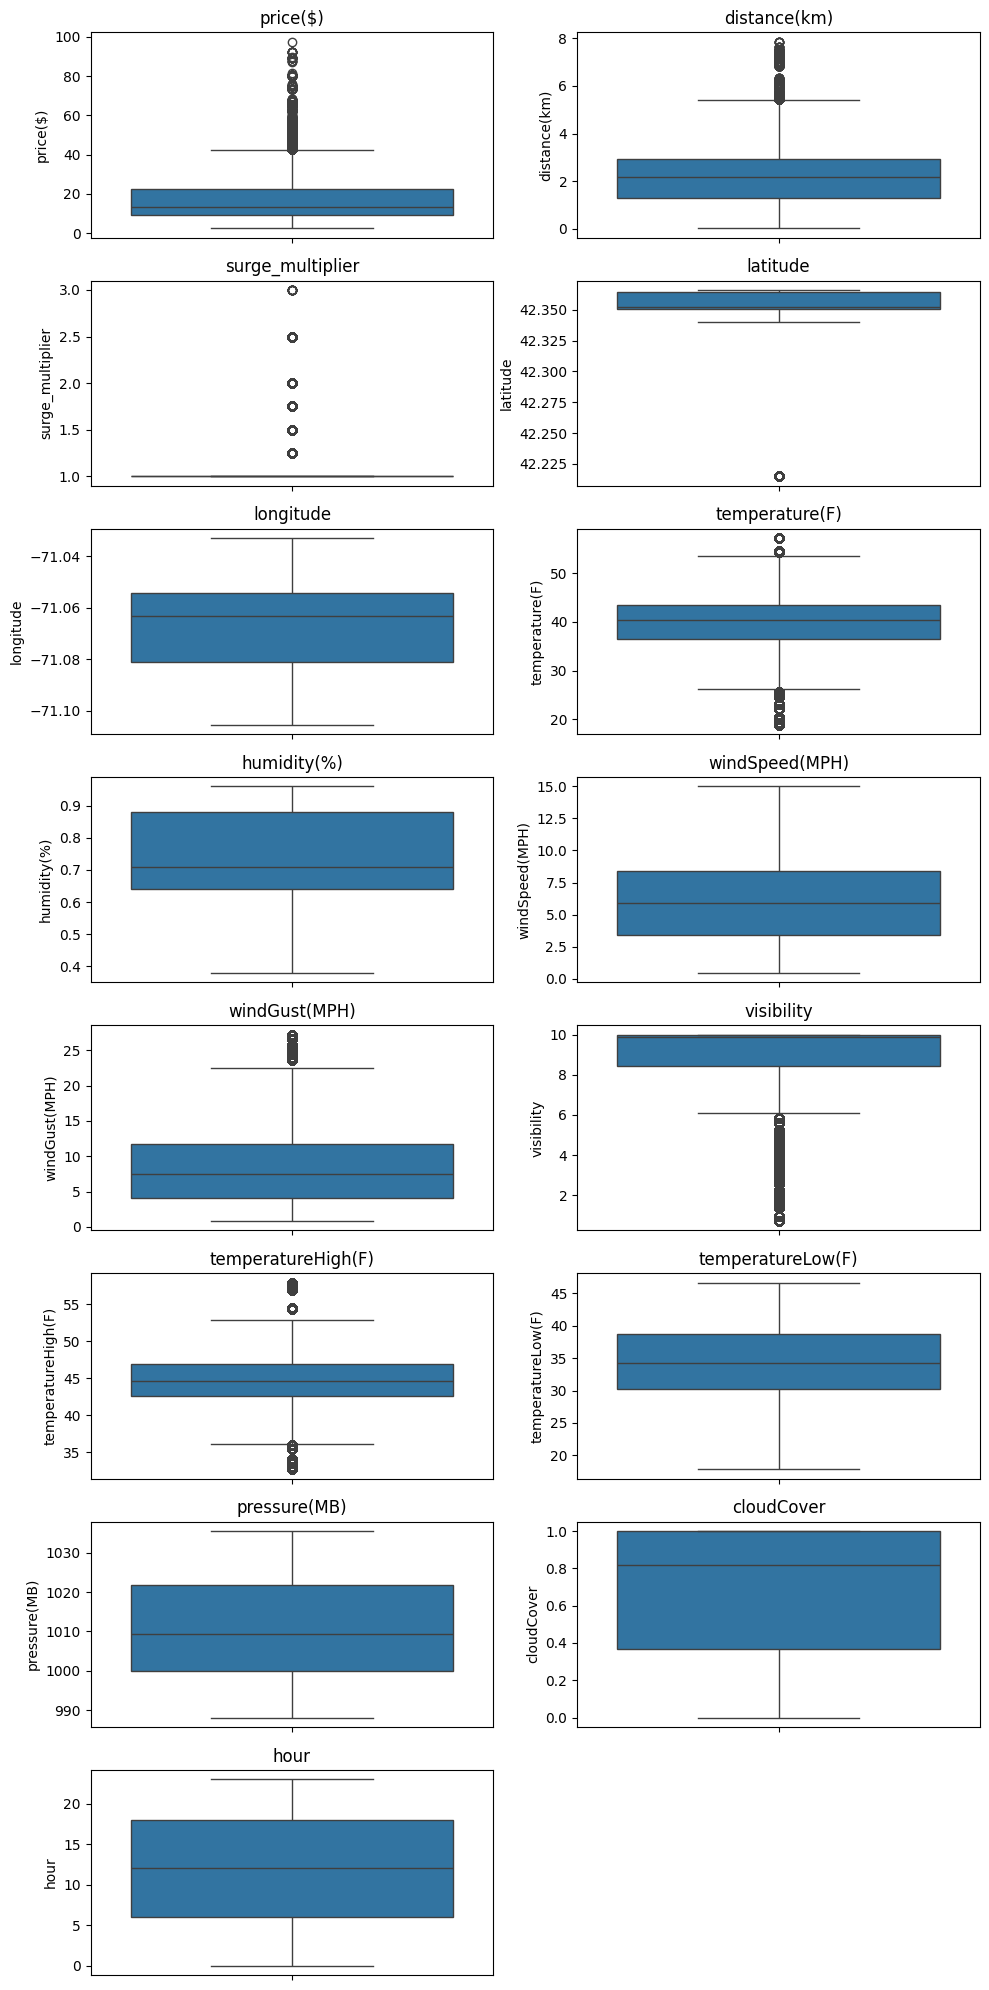

In [ ]:
# Outliers Detection
plt.figure(figsize=(10, 20))
numeric_col = df.select_dtypes(exclude="object")

for i, col in enumerate(numeric_col.columns):
  plt.subplot(8, 2, i+1)
  sns.boxplot(numeric_col[col])
  plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [ ]:
# We will remove outliers using Inter Quartile Range

num_data = df.select_dtypes(exclude="object")

quarter_1 = num_data.quantile(0.25)
quarter_3 = num_data.quantile(0.75)

iqr = quarter_3 - quarter_1

lower_bound = quarter_1 - 1.5 * iqr
upper_bound = quarter_3 + 1.5 * iqr

In [ ]:

outliers = ((num_data < lower_bound) | (num_data > upper_bound)).any(axis=True).sum()
outliers

326935

In [ ]:
# data after cleaning ouliers.

clean_data = df[~((num_data < lower_bound) | (num_data > upper_bound)).any(axis=True)]
clean_data

,source,destination,cab_type,product_id,name,price($),distance(km),surge_multiplier,latitude,longitude,...,visibility,temperatureHigh(F),temperatureLow(F),pressure(MB),cloudCover,date,time,month,day,hour
10,Back Bay,Northeastern University,Lyft,lyft_premier,Lux,13.5,1.08,1.0,42.3503,-71.0810,...,9.920,42.32,31.57,1016.84,0.12,2018-11-30,16:13:03,November,Friday,16
11,Back Bay,Northeastern University,Lyft,lyft,Lyft,7.0,1.08,1.0,42.3503,-71.0810,...,10.000,42.72,37.59,991.85,1.00,2018-11-28,19:23:07,November,Wednesday,19
12,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,1.11,1.0,42.3647,-71.0542,...,9.833,42.52,31.71,1017.16,1.00,2018-11-30,22:13:01,November,Friday,22
17,North End,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,5.5,1.11,1.0,42.3647,-71.0542,...,9.796,44.61,28.79,1007.12,0.53,2018-11-29,19:18:00,November,Thursday,19
19,North Station,Haymarket Square,Lyft,lyft_plus,Lyft XL,11.0,0.72,1.0,42.3661,-71.0631,...,10.000,43.78,34.12,1022.94,0.06,2018-12-16,06:15:11,December,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,-71.0643,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23


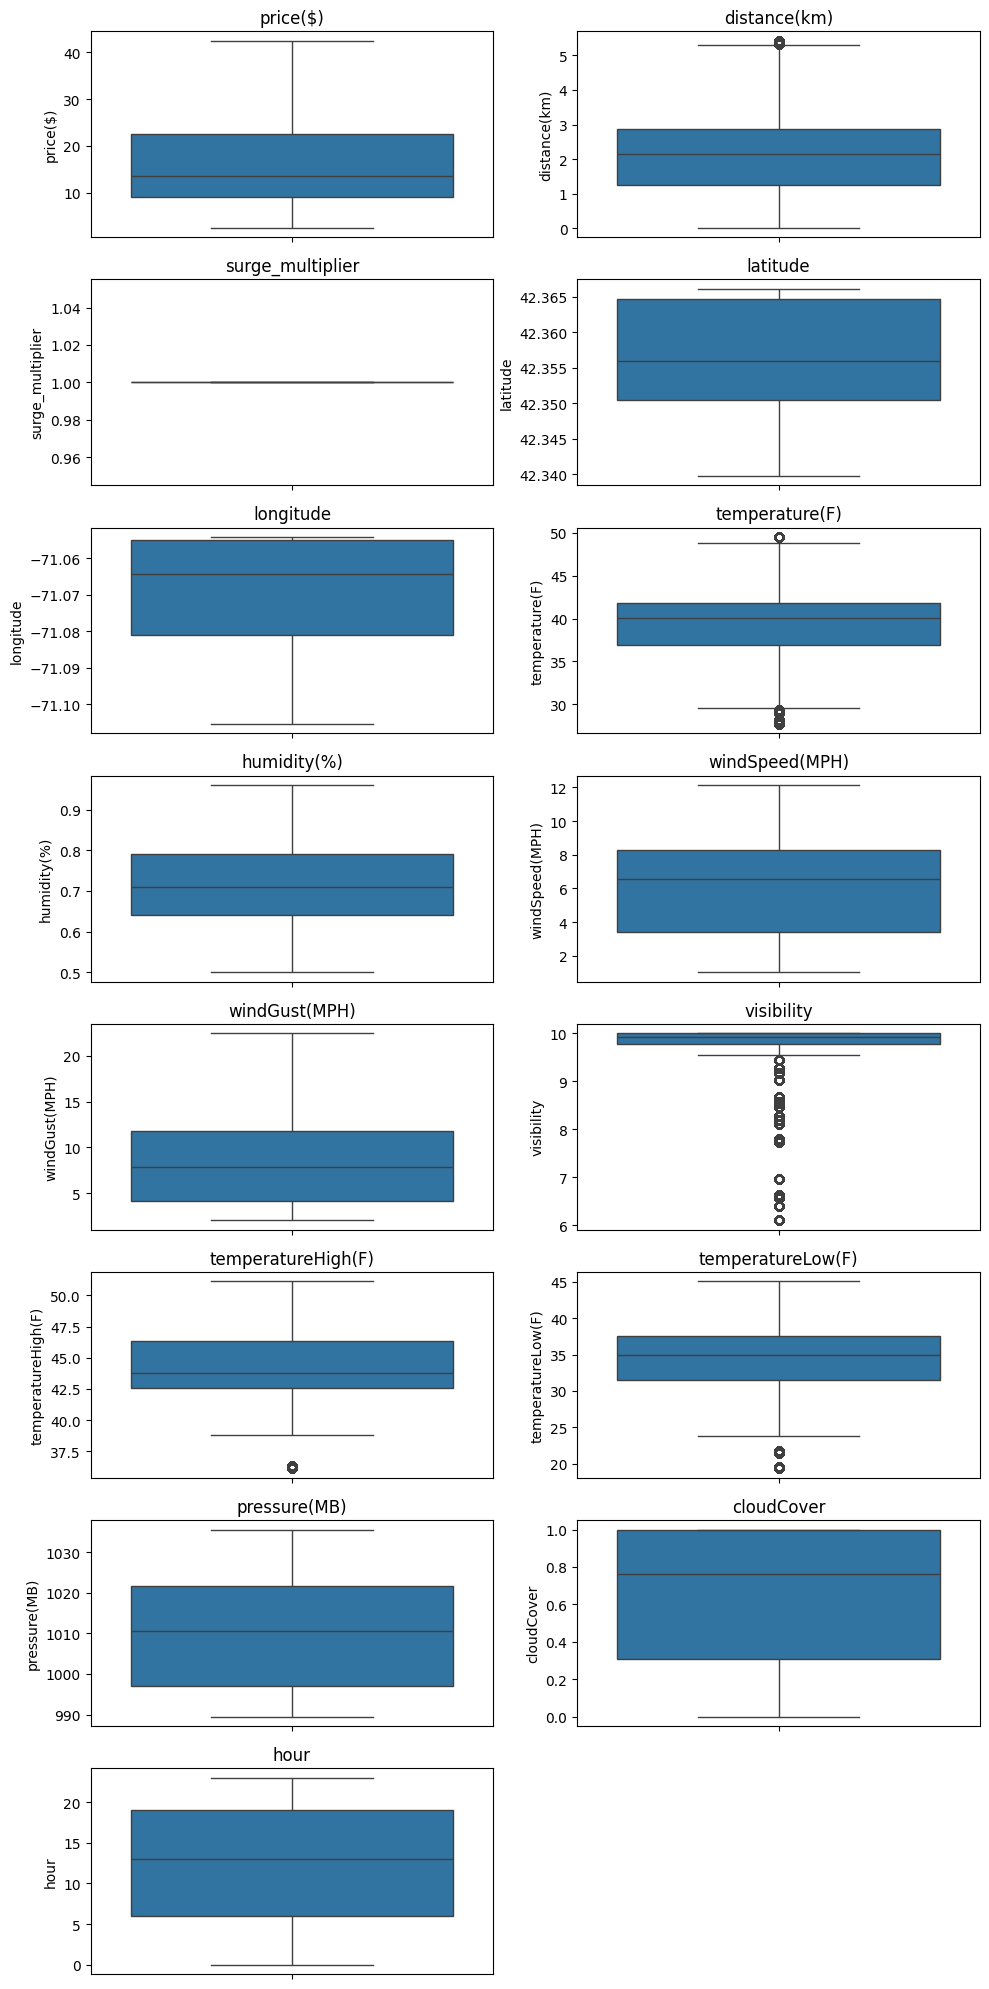

In [ ]:
# after cleaning data, check outliers using boxplot
plt.figure(figsize=(10, 20))
numeric_col = clean_data.select_dtypes(exclude="object")

for i, col in enumerate(numeric_col.columns):
  plt.subplot(8, 2, i+1)
  sns.boxplot(clean_data[col])
  plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [ ]:
# After cleaning tha data i have checked the skewness
num_clean_data = clean_data.select_dtypes(exclude="object")

for col in num_clean_data.columns:
  skewness = num_clean_data[col].skew()
  if skewness < -1 or skewness > 1:
    print(f"{col}: Skewed Distribution")
  else:
    print(f"{col}: Not Skewed")

price($): Not Skewed
distance(km): Not Skewed
surge_multiplier: Not Skewed
latitude: Not Skewed
longitude: Not Skewed
temperature(F): Not Skewed
humidity(%): Not Skewed
windSpeed(MPH): Not Skewed
windGust(MPH): Not Skewed
visibility: Skewed Distribution
temperatureHigh(F): Not Skewed
temperatureLow(F): Not Skewed
pressure(MB): Not Skewed
cloudCover: Not Skewed
hour: Not Skewed


In [ ]:
# Created new index column to organize indexing of the dataset

clean_data = clean_data.reset_index(drop=True).reset_index()
clean_data

,index,source,destination,cab_type,product_id,name,price($),distance(km),surge_multiplier,latitude,...,visibility,temperatureHigh(F),temperatureLow(F),pressure(MB),cloudCover,date,time,month,day,hour
0,0,Back Bay,Northeastern University,Lyft,lyft_premier,Lux,13.5,1.08,1.0,42.3503,...,9.920,42.32,31.57,1016.84,0.12,2018-11-30,16:13:03,November,Friday,16
1,1,Back Bay,Northeastern University,Lyft,lyft,Lyft,7.0,1.08,1.0,42.3503,...,10.000,42.72,37.59,991.85,1.00,2018-11-28,19:23:07,November,Wednesday,19
2,2,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,1.11,1.0,42.3647,...,9.833,42.52,31.71,1017.16,1.00,2018-11-30,22:13:01,November,Friday,22
3,3,North End,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,5.5,1.11,1.0,42.3647,...,9.796,44.61,28.79,1007.12,0.53,2018-11-29,19:18:00,November,Thursday,19
4,4,North Station,Haymarket Square,Lyft,lyft_plus,Lyft XL,11.0,0.72,1.0,42.3661,...,10.000,43.78,34.12,1022.94,0.06,2018-12-16,06:15:11,December,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311036,311036,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23
311037,311037,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23
311038,311038,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23
311039,311039,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,42.3519,...,9.785,44.76,34.83,1023.57,0.31,2018-12-01,23:53:05,December,Saturday,23


**Data Intelligence**

  cab_type   count
0     Uber  164936
1     Lyft  146105
--------------------------------------------------


<Figure size 600x600 with 0 Axes>

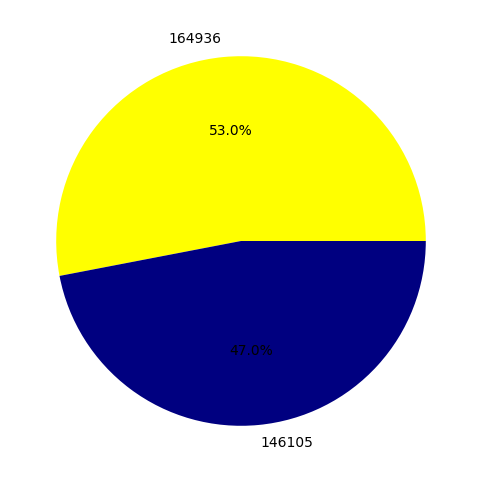

In [ ]:
#  What is the ride distribution based on Cab Type?
from contextlib import redirect_stderr
# Ride comparison by each service.
print(clean_data["cab_type"].value_counts().reset_index())

print("-"*50)

plt.figure(figsize=(6, 6))
value = clean_data["cab_type"].value_counts()
label = clean_data["cab_type"].value_counts()
plt.figure(figsize=(6, 6))
colors = ["yellow", "navy"]
plt.pie(value, labels=label, autopct='%1.1f%%', colors=colors).index
plt.show()

  cab_type  Avg Price
0     Lyft  16.451834
1     Uber  15.537599
--------------------------------------------------


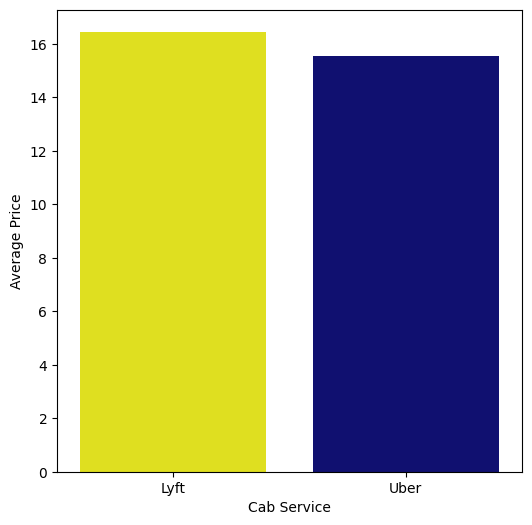

In [ ]:
# Calculate average fare of Uber and Lyft rides
print(clean_data.groupby("cab_type")["price($)"].mean().reset_index().rename(columns={"price($)": "Avg Price"}))

print("-"*50)

plt.figure(figsize=(6, 6))
colors = sns.color_palette(["yellow", "navy"])
sns.barplot(clean_data.groupby("cab_type")["price($)"].mean(), palette = colors)
plt.xlabel("Cab Service")
plt.ylabel("Average Price")
plt.show()

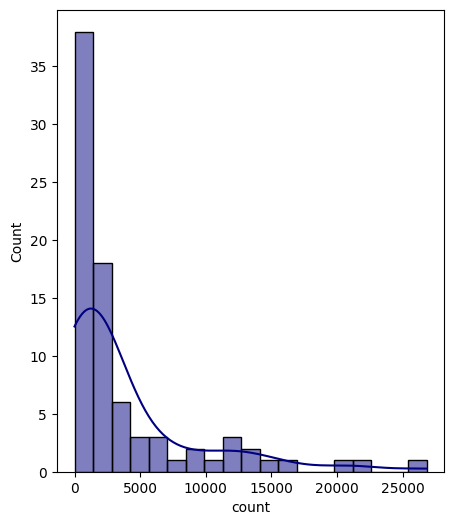

In [ ]:
#  Analyze the distribution of fares
plt.figure(figsize=(5, 6))
data=clean_data["price($)"].value_counts()

sns.histplot(data, kde=True, color = "navy")
plt.show()

In [ ]:
#  What is the overall Price per Kilometer

price_sum = clean_data["price($)"].sum()
distance_sum = clean_data["distance(km)"].sum()

price_per_km =  price_sum/distance_sum
price_per_km

7.476209946902462

cab_type
Lyft    7.604449
Uber    7.359798
dtype: float64
--------------------------------------------------


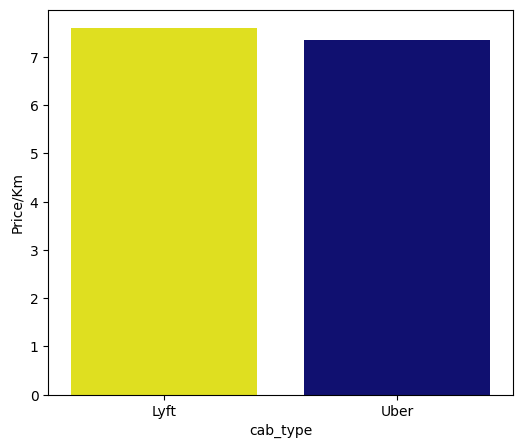

In [ ]:
# Price per/km of Uber and Lyft seperately

p_sum = clean_data.groupby("cab_type")["price($)"].sum()
dis_sum = clean_data.groupby("cab_type")["distance(km)"].sum()
data=p_sum/dis_sum
print(data)

print("-"*50)

plt.figure(figsize=(6, 5))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(data, palette = color)
plt.ylabel("Price/Km")
plt.show()

      month  number of rides
0  December           149274
1  November           161767
--------------------------------------------------


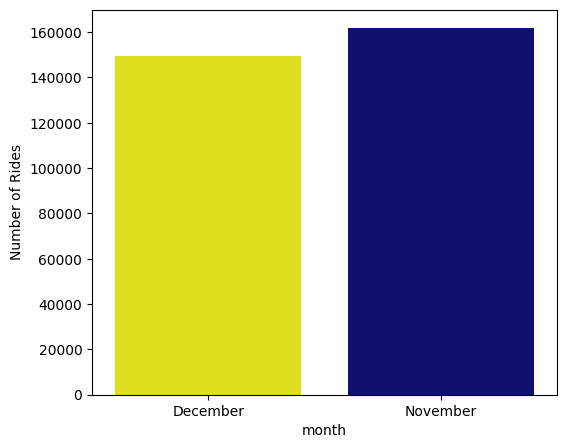

In [ ]:
# what are total rides on monthly basis
print(clean_data.groupby("month")["index"].count().reset_index().rename(columns={"index": "number of rides"}))

print("-"*50)

plt.figure(figsize=(6, 5))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(clean_data.groupby("month")["index"].count(), palette = color)
plt.ylabel("Number of Rides")
plt.show()

      month    revenue
0  December  2385263.0
1  November  2581141.7
--------------------------------------------------


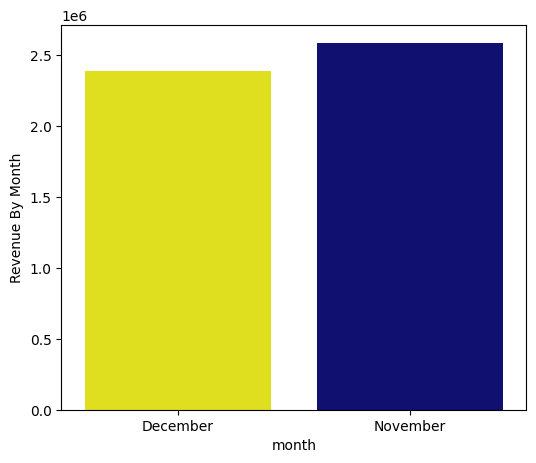

In [ ]:
# What revenue is generated on monthly basis

print(clean_data.groupby("month")["price($)"].sum().reset_index().rename(columns={"price($)": "revenue"}))

print("-"*50)

plt.figure(figsize=(6, 5))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(clean_data.groupby("month")["price($)"].sum(), palette = color)
plt.ylabel("Revenue By Month")
plt.show()

--------------------------------------------------
         day     revenue
0     Friday  1022380.85
1     Monday   554352.50
2   Saturday   662231.00
3     Sunday   708738.50
4   Thursday   698016.00
5    Tuesday   441359.00
6  Wednesday   879326.85


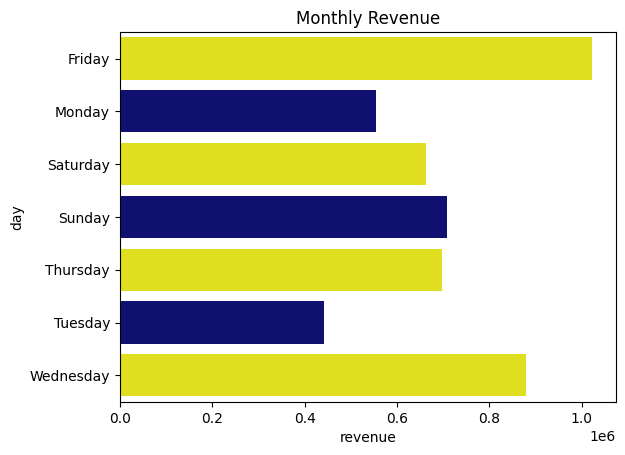

In [ ]:
# What is the revenue patterns by days?
monthly_rev = clean_data.groupby("day")["price($)"].sum().reset_index(name="revenue")

print("-"*50)

color = sns.color_palette(["yellow", "navy"])
sns.barplot(x=monthly_rev["revenue"], y=monthly_rev["day"], palette = color)
print(monthly_rev)
plt.title("Monthly Revenue")
plt.show()

cab_type
Lyft    2.163448
Uber    2.111145
Name: distance(km), dtype: float64
--------------------------------------------------


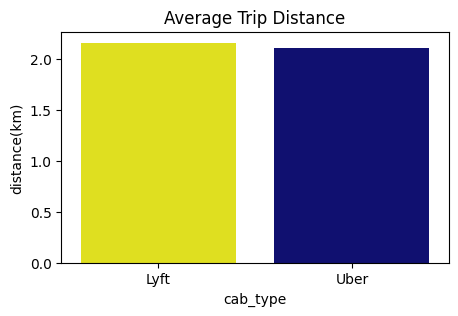

In [ ]:
# What is the average trip distance by Uber and Lyft

avg_trip_dis=clean_data.groupby("cab_type")["distance(km)"].mean()

print(avg_trip_dis)

print("-"*50)

plt.figure(figsize=(5, 3))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(avg_trip_dis, palette = color)
plt.title("Average Trip Distance")
plt.show()

cab_type
Lyft    7.604449
Uber    7.359798
dtype: float64
--------------------------------------------------


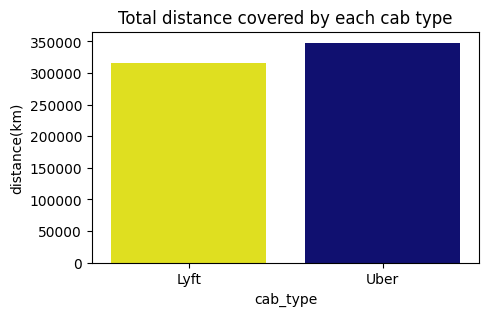

In [ ]:
#  Total distance covered by each cab type
data2= clean_data.groupby("cab_type")["distance(km)"].sum()
print(data)

print("-"*50)

plt.figure(figsize=(5, 3))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(data2, palette = color)
plt.title("Total distance covered by each cab type")
plt.show()

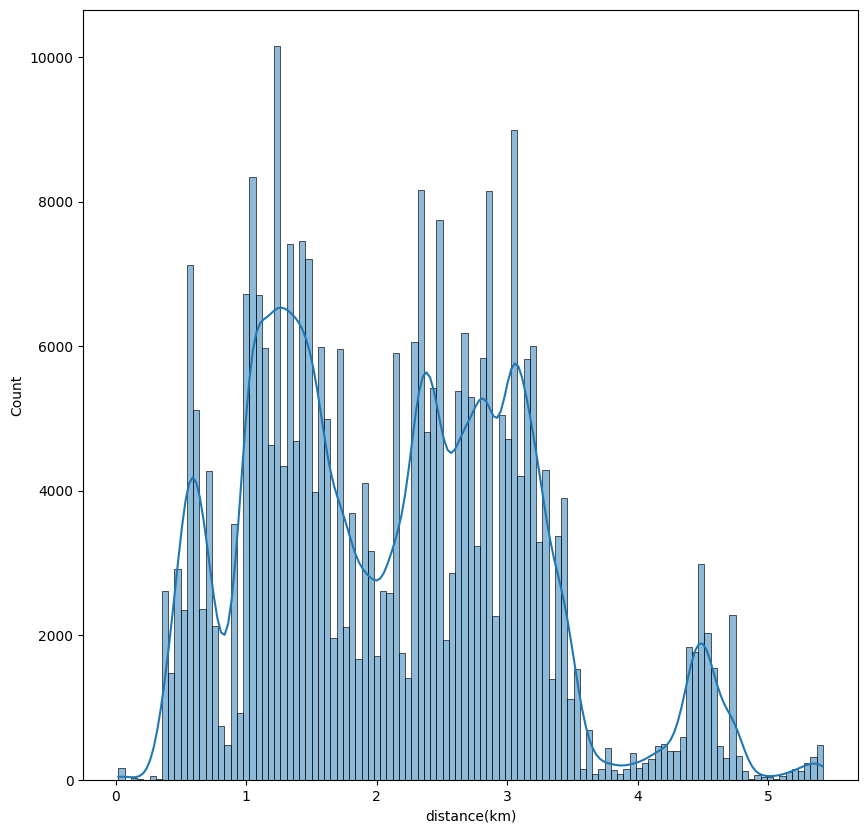

In [ ]:
# what is the distribution of trip distances to identify common trip lengths
plt.figure(figsize=(10, 10))

sns.histplot(clean_data["distance(km)"], kde=True)
plt.show()

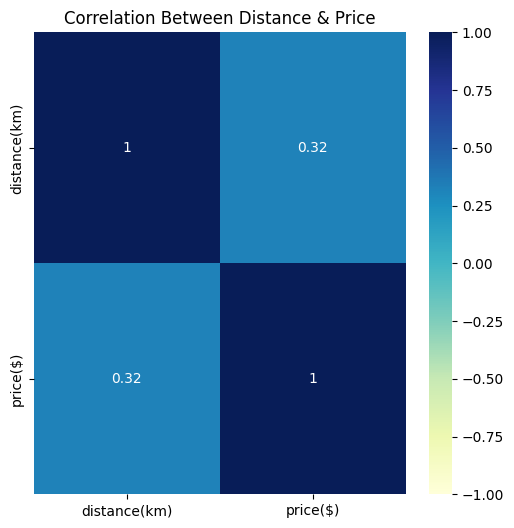

In [ ]:
# Examine the correlation between distance and fare to understand pricing dynamics
plt.figure(figsize=(6, 6))
data=clean_data[["distance(km)", "price($)"]].corr()

sns.heatmap(data, annot=True, vmin="-1", vmax="1", cmap = "YlGnBu")
plt.title("Correlation Between Distance & Price")

plt.show()

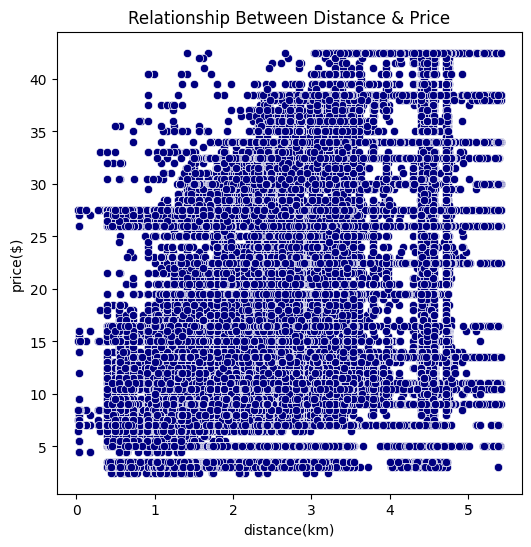

In [ ]:
plt.figure(figsize=(6, 6))
data=clean_data[["distance(km)", "price($)"]]

sns.scatterplot(data=data, x="distance(km)", y="price($)", color="navy")
plt.title("Relationship Between Distance & Price")

plt.show()

Text(0.5, 36.72222222222221, 'Metric')

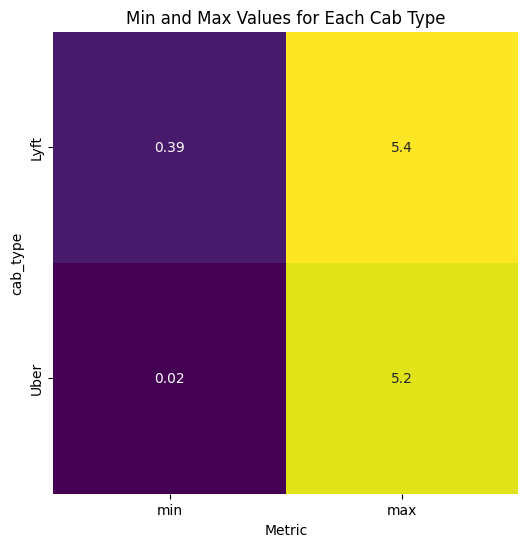

In [ ]:
# What are the longest and shortest trips by each cab service?

data=clean_data.groupby("cab_type")["distance(km)"].agg(["min", "max"])

plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, cbar=False, cmap = "viridis")

# Add title and labels
plt.title("Min and Max Values for Each Cab Type")
plt.ylabel("cab_type")
plt.xlabel("Metric")

   cab_type            source  count
0      Lyft  Haymarket Square  12996
12     Uber     South Station  14210
--------------------------------------------------


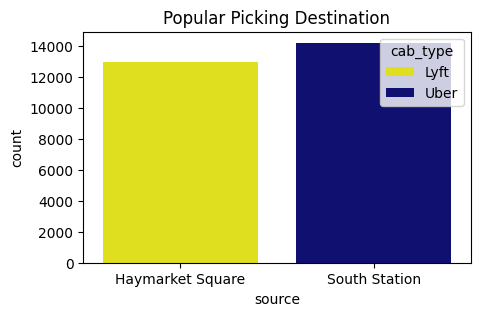

In [ ]:
# Find the popular pickup destination of each cab type.

popular_destination = clean_data.groupby("cab_type")["source"].value_counts().reset_index(name="count")

max_destination = popular_destination.loc[popular_destination.groupby("cab_type")["count"].idxmax()]

print(max_destination)

print("-"*50)

plt.figure(figsize=(5, 3))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(x="source", y="count", hue="cab_type", data=max_destination, palette = color)
plt.title("Popular Picking Destination")
plt.show()

   cab_type              source  count
11     Lyft            Back Bay  11342
23     Uber  Financial District  11953
--------------------------------------------------


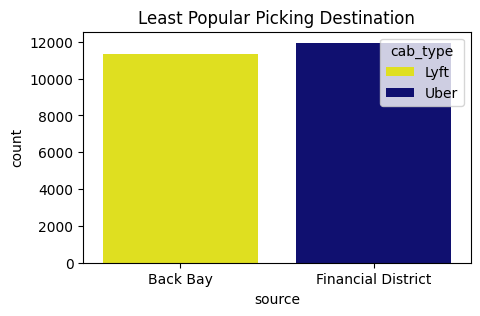

In [ ]:
# # Find the least popular pickup destination of each cab type.

least_popular_destination = clean_data.groupby("cab_type")["source"].value_counts().reset_index(name="count")

min_destination = popular_destination.loc[popular_destination.groupby("cab_type")["count"].idxmin()]

print(min_destination)

print("-"*50)

plt.figure(figsize=(5, 3))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(x="source", y="count", hue="cab_type", data=min_destination, palette = color)
plt.title("Least Popular Picking Destination")
plt.show()

     Months Cab_Type  No. of Rides
0  December     Lyft         70219
1  December     Uber         79055
2  November     Lyft         75886
3  November     Uber         85881
--------------------------------------------------


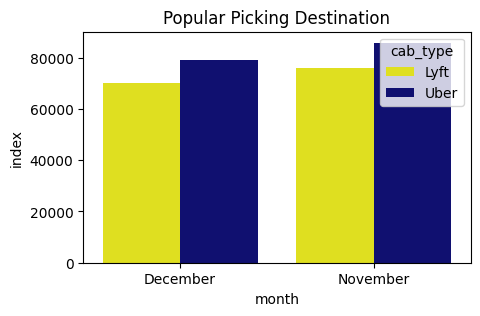

In [ ]:
# Which cab rides are peaked in months
peak_months = clean_data.groupby(["month","cab_type"])["index"].count().reset_index()
print(peak_months.rename(columns={"month": "Months", "index": "No. of Rides", "cab_type": "Cab_Type"}))

print("-"*50)

plt.figure(figsize=(5, 3))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(x="month", y="index", hue="cab_type", data=peak_months, palette = color)
plt.title("Popular Picking Destination")
plt.show()

In [ ]:
# In which days of the week rides normally surge?
clean_data.groupby(["day", "cab_type"])["index"].count().reset_index().sort_values(by="index", ascending=False)[:2]

,day,cab_type,index
1,Friday,Uber,33979
0,Friday,Lyft,30282


        day cab_type  index
10  Tuesday     Lyft  13030
11  Tuesday     Uber  14631
2    Monday     Lyft  16211
3    Monday     Uber  18563
--------------------------------------------------


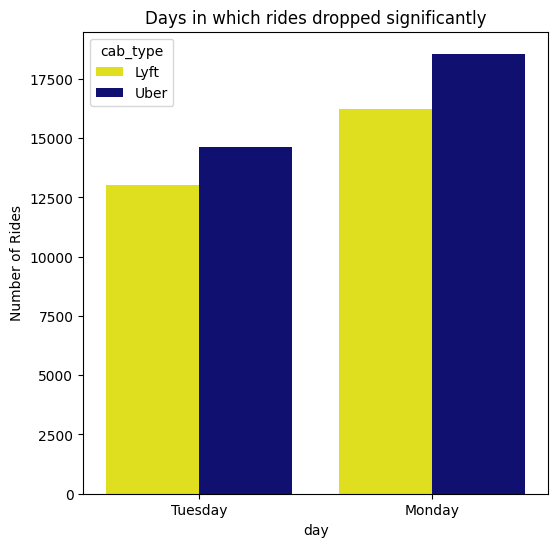

In [ ]:
# Day in which rides were signifnicantly droped
rides_dropped=clean_data.groupby(["day", "cab_type"])["index"].count().reset_index().nsmallest(4, "index")
print(rides_dropped)

print("-"*50)

plt.figure(figsize=(6, 6))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(x="day", y="index", hue="cab_type", data=rides_dropped, palette = color)
plt.title("Days in which rides dropped significantly")
plt.ylabel("Number of Rides")
plt.show()

In [ ]:
# Assess how different weather conditions (temperature) affect ride pricing.
print(clean_data.groupby("temperature(F)")["price($)"].mean().reset_index().nlargest(5, "temperature(F)"))

print("-"*50)

print(clean_data.groupby("temperature(F)")["price($)"].mean().reset_index().nsmallest(5, "temperature(F)"))

     temperature(F)   price($)
151           49.50  16.039683
150           48.83  15.582927
149           48.45  15.876825
148           45.83  16.095845
147           45.82  15.940987
--------------------------------------------------
   temperature(F)   price($)
0           27.71  15.918159
1           27.77  16.253650
2           27.83  16.099517
3           27.93  16.111858
4           28.20  16.402527


In [ ]:
# Assess how different weather conditions (temperature) affect ride frequency.
print(clean_data.groupby("temperature(F)")["index"].count().reset_index().nlargest(5, "temperature(F)"))

print("-"*50)

print(clean_data.groupby("temperature(F)")["index"].count().reset_index().nsmallest(5, "temperature(F)"))



     temperature(F)  index
151           49.50   1638
150           48.83   1640
149           48.45   1644
148           45.83   1492
147           45.82   3262
--------------------------------------------------
   temperature(F)  index
0           27.71   1619
1           27.77   1644
2           27.83   1658
3           27.93   1636
4           28.20   1662


weather_summary
Clear                 45734
Drizzle                1478
Mostly Cloudy         81202
Overcast             113134
Partly Cloudy         63932
Possible Drizzle       5561
Name: index, dtype: int64
--------------------------------------------------


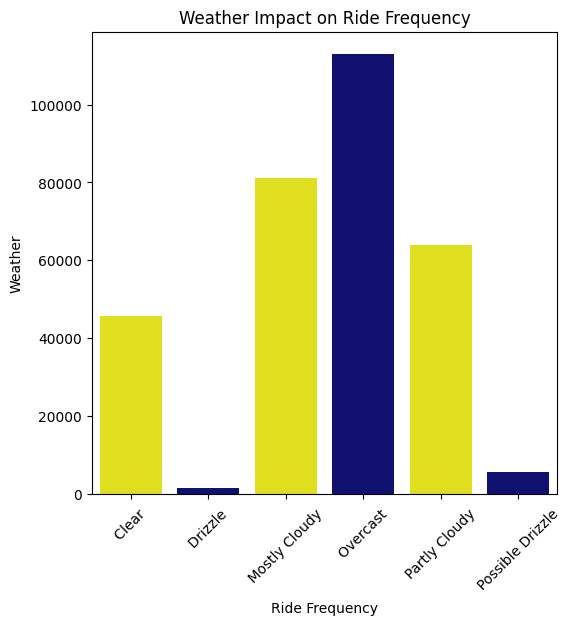

In [ ]:
# What is the impact of different weather conditions on the overall ride patterns?
ride_patterns = clean_data.groupby("weather_summary")["index"].count()
print(ride_patterns)

print("-"*50)


plt.figure(figsize=(6, 6))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(data=ride_patterns, palette = color)
plt.title("Weather Impact on Ride Frequency")
plt.xticks(rotation=45)
plt.xlabel("Ride Frequency")
plt.ylabel("Weather")
plt.show()

weather_summary
Clear                15.846030
Drizzle              16.326116
Mostly Cloudy        15.989026
Overcast             15.972864
Partly Cloudy        16.002299
Possible Drizzle     16.022028
Name: price($), dtype: float64
--------------------------------------------------


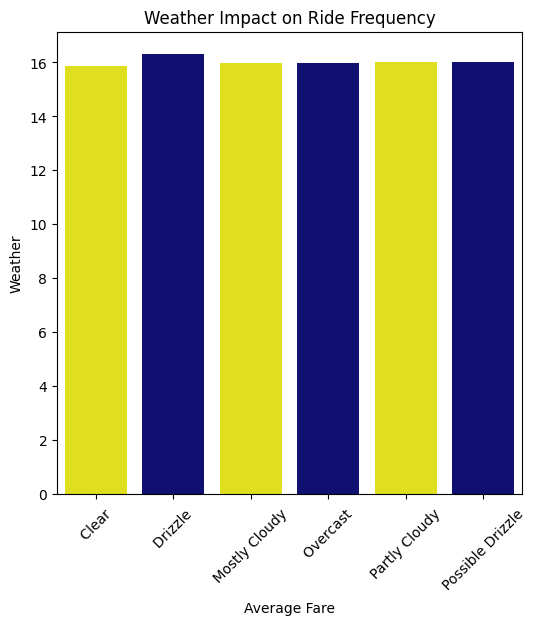

In [ ]:
#	Average Fare Variation by Weather
average_price_by_weather = clean_data.groupby("weather_summary")["price($)"].mean()
print(average_price_by_weather)


print("-"*50)


plt.figure(figsize=(6, 6))
color = sns.color_palette(["yellow", "navy"])
sns.barplot(data=average_price_by_weather, palette = color)
plt.title("Weather Impact on Ride Frequency")
plt.xticks(rotation=45)
plt.xlabel("Average Fare")
plt.ylabel("Weather")
plt.show()